In [66]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from joblib import dump
import joblib
import pathlib

## Function to load and explore the data `load_and_explore_data(data_file)`

In [13]:
# Load the dataset and perform initial exploration
def load_and_explore_data(data_file):
    # Load the dataset
    try:
        df = pd.read_csv(data_file)
        print("Dataset loaded successfully.")
        # Display the first few rows of the dataframe
        print("\nFirst few rows of the dataset:")
        display(df.head())
        # Check for missing values
        missing_values = df.isnull().sum()
        print("\nMissing values in the dataset:")
        print(missing_values)
        # Check data types of columns
        print("\nData types of columns:")
        print(df.dtypes)
        # Display basic statistics of numerical columns
        print("\nBasic statistics of numerical columns:")
        display(df.describe())
    except Exception as e:
        print("Error loading dataset:", e)

In [14]:
print(os.listdir('data'))

['Crop_recommendation.csv', 'Crop_recommendation.xls']


In [15]:
# Specify the path to the dataset file
data_file = "data/Crop_recommendation.csv"

# Call the function to load and explore the dataset
load_and_explore_data(data_file)

Dataset loaded successfully.

First few rows of the dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



Missing values in the dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Data types of columns:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Basic statistics of numerical columns:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Function for EDA `exploratory_data_analysis(df)`

In [21]:
# Conduct exploratory data analysis (EDA)
def exploratory_data_analysis(df):
    try:
        # Visualize distributions of numerical features
        numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
        for feature in numerical_features:
            plt.figure(figsize=(8, 4))
            sns.histplot(df[feature], bins=20, kde=True)
            plt.title(f'Distribution of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.show()

        # Explore relationships between variables
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix')
        plt.show()
    except Exception as e:
        print("Error during exploratory data analysis:", e)

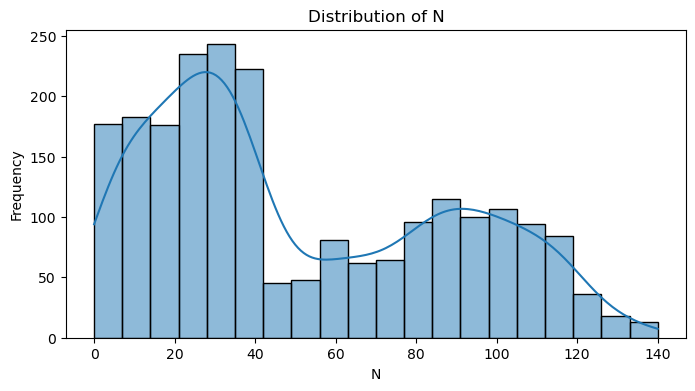

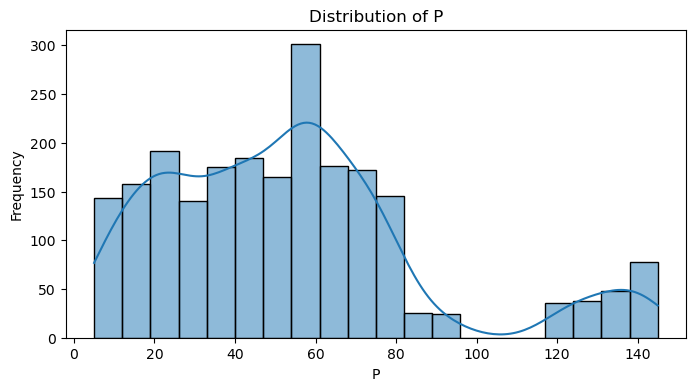

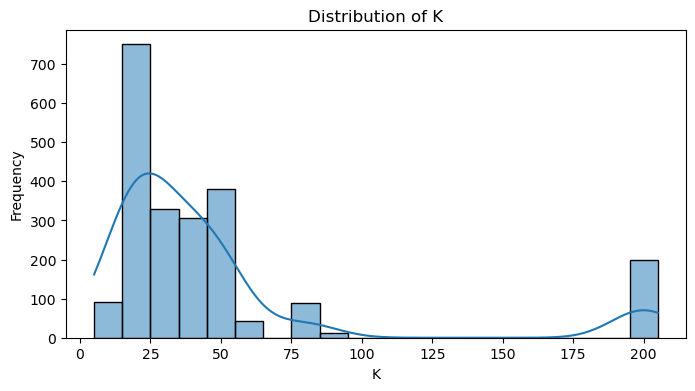

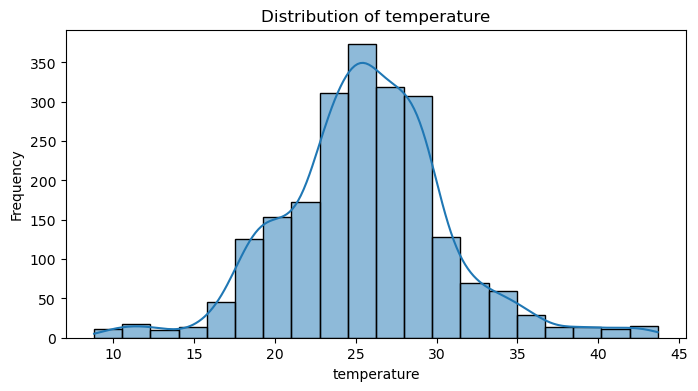

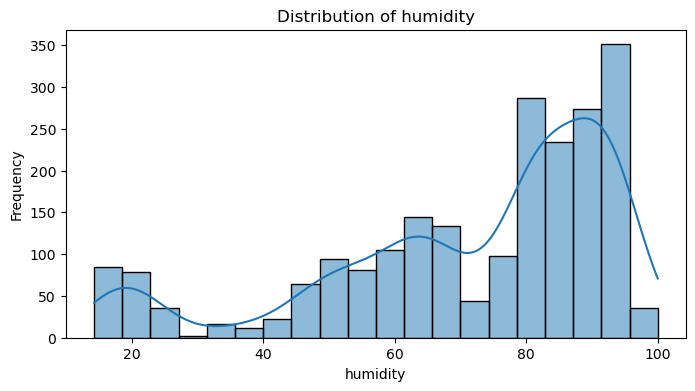

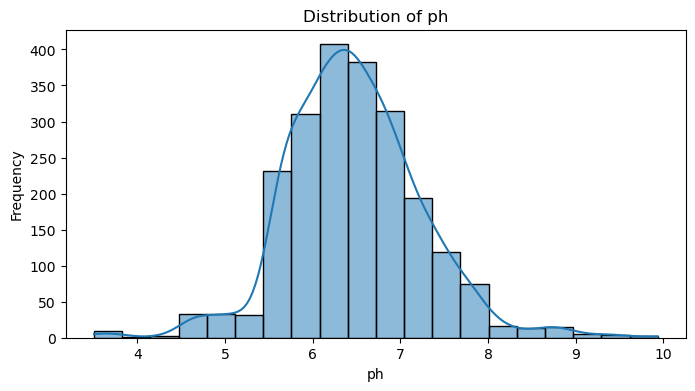

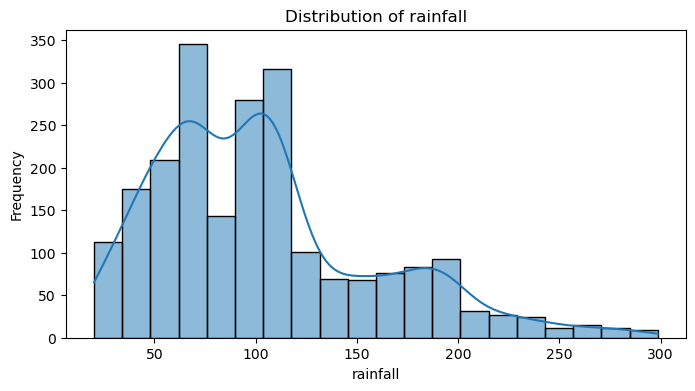

C:\Users\shahe\AppData\Local\Temp\ipykernel_24152\28058701.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


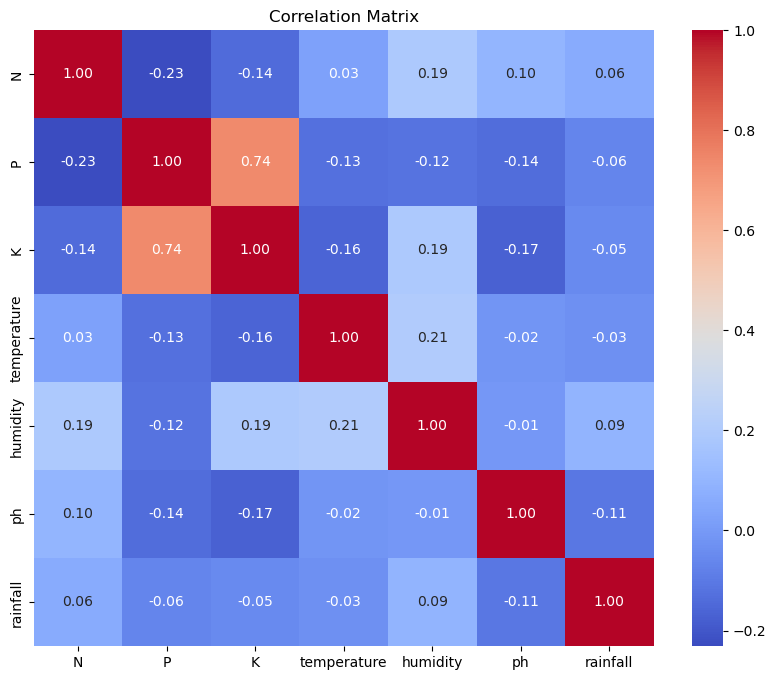

In [24]:
# Load the dataset
data_file = "data/Crop_recommendation.csv"
df_data = pd.read_csv(data_file)

# Call the function to perform exploratory data analysis
exploratory_data_analysis(df_data)

Distributions of temperature and ph are clearly normal.

## Function to preprocess data `preprocess_data()`

In [31]:
# Preprocess the data
def preprocess_data(df):
    try:
        # Split the dataset into features (X) and target variable (y)
        # Drop the 'crop_yield from features (X) assuming it is the target variable
        X = df.drop(columns=['label'])  
        y = df['label']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalize numerical features to a standard scale
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.fit_transform(X_test)

        return X_train_scaled, X_test_scaled, y_train, y_test
    except Exception as e:
        print("Error during data preprocessing:", e)

In [32]:
# Call the function to preprocess the data
X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(df_data)

In [37]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(1760, 7)
(1760,)
(440, 7)
(440,)


## Model Training

In [40]:
# Train Decision Tree Classifier
def train_decision_tree(X_train, y_train):
    try:
        # Initialize and train the Decision Tree Classifier
        dt_classifier = DecisionTreeClassifier()
        dt_classifier.fit(X_train, y_train)
        return dt_classifier
    except Exception as e:
        print("Error during Decision Tree training:", e)
        
# Train Logistic Regression Classifier
def train_logistic_regression(X_train, y_train):
    try:
        # Initialize and train the Logistic Regression Classifier
        lr_classifier = LogisticRegression()
        lr_classifier.fit(X_train, y_train)
        return lr_classifier
    except Exception as e:
        print("Error during Logistic Regression training:", e)
        
# Train Random Forest Classifier
def train_random_forest(X_train, y_train):
    try:
        # Initialize and train the Random Forest Classifier
        rf_classifier = RandomForestClassifier()
        rf_classifier.fit(X_train, y_train)
        return rf_classifier
    except Exception as e:
        print("Error during Random Forest training:", e)

In [43]:
# Train and evaluate Decision Tree Classifier
dt_classifier = train_decision_tree(X_train_scaled, y_train)

# Train and evaluate Logistic Regression Classifier
lr_classifier = train_logistic_regression(X_train_scaled, y_train)

# Train and evaluate Random Forest Classifier
rf_classifier = train_random_forest(X_train_scaled, y_train)

In [47]:
# Function to evaluate classifier and print multiple metrics
def evaluate_classifier(classifier, X_test, y_test, classifier_name):
    try:
        # Make predictions using the classifier
        y_pred = classifier.predict(X_test)
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision_micro = precision_score(y_test, y_pred, average='micro')
        recall_micro = recall_score(y_test, y_pred, average='micro')
        f1_micro = f1_score(y_test, y_pred, average='micro')
        precision_macro = precision_score(y_test, y_pred, average='macro')
        recall_macro = recall_score(y_test, y_pred, average='macro')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        
        # Print evaluation metrics
        print(f"Evaluation metrics for {classifier_name}:")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision (micro): {precision_micro:.2f}")
        print(f"Recall (micro): {recall_micro:.2f}")
        print(f"F1-score (micro): {f1_micro:.2f}")
        print(f"Precision (macro): {precision_macro:.2f}")
        print(f"Recall (macro): {recall_macro:.2f}")
        print(f"F1-score (macro): {f1_macro:.2f}\n")
        
        # Classification report
        print(f"Classification Report for {classifier_name}:")
        print(classification_report(y_test, y_pred))
    except Exception as e:
        print(f"Error during evaluation of {classifier_name}:", e)

In [48]:
# Evaluate Decision Tree Classifier
evaluate_classifier(dt_classifier, X_test_scaled, y_test, "Decision Tree Classifier")

# Evaluate Logistic Regression Classifier
evaluate_classifier(lr_classifier, X_test_scaled, y_test, "Logistic Regression Classifier")

# Evaluate Random Forest Classifier
evaluate_classifier(rf_classifier, X_test_scaled, y_test, "Random Forest Classifier")

Evaluation metrics for Decision Tree Classifier:
Accuracy: 0.95
Precision (micro): 0.95
Recall (micro): 0.95
F1-score (micro): 0.95
Precision (macro): 0.95
Recall (macro): 0.95
F1-score (macro): 0.95

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.93      0.70      0.80        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      0.91      0.89        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.58      1.00      0.73        11
       maize       1.00      0.90      0.95        21
       mango       1.00      1.00      1.00 

In [79]:
# Define the directory where you want to save the model
save_folder = 'trained models'

# Check if the directory exists, if not, create it
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [80]:
# Save the trained model to the specified folder
model_filename = os.path.join(save_folder, f'trained_model_rf_classifier.joblib')
dump(rf_classifier, model_filename)

['trained models\\trained_model_rf_classifier.joblib']